In [1]:
import mindspore as ms
from mindspore import Tensor
import numpy as np                                          # 导入numpy库并简写为np
from mindquantum.core.circuit import Circuit                # 导入Circuit模块，用于搭建量子线路
from mindquantum.core.gates import H, RX, RY, RZ            # 导入量子门H, RX, RY, RZ
from mindquantum.core.parameterresolver import PRGenerator  # 导入参数生成器模块

from mindquantum.core.operators import QubitOperator
from mindquantum.core.operators import Hamiltonian
from mindquantum.simulator import Simulator
from mindquantum.framework import MQLayer
from mindspore.nn import Adam, TrainOneStepCell

In [20]:
data = [
    [1, 2],
    [3, 4],
    [5, 6]
]

In [21]:
tensor_2d = Tensor(data, dtype=ms.float32)

In [23]:
nor = ms.ops.norm(tensor_2d, axis=1)

TypeError: norm() got an unexpected keyword argument 'axis'

In [18]:
tensor_2d = tensor_2d/nor

In [19]:
print(tensor_2d)

[[0.10482848 0.20965695]
 [0.31448543 0.4193139 ]
 [0.5241424  0.62897086]]


In [24]:
data[1]

[3, 4]

In [25]:
data[2]

[5, 6]

In [26]:
tensor_2d[1]

Tensor(shape=[2], dtype=Float32, value= [ 3.00000000e+00,  4.00000000e+00])

In [29]:
print(ms.ops.norm(tensor_2d[1]))

5.0


In [30]:
tensor_2d[1] = tensor_2d[1]/ms.ops.norm(tensor_2d[1])

In [31]:
print(tensor_2d[1])

[0.6 0.8]


In [32]:
print(tensor_2d)

[[1.  2. ]
 [0.6 0.8]
 [5.  6. ]]


In [7]:
from mindquantum.core.circuit import UN
from mindquantum.core.gates import X, SWAP

In [5]:
circuit1 = UN(X, maps_obj = [0, 1], maps_ctrl = [2, 3])

In [6]:
print(circuit1)

      ┏━━━┓         
q0: ──┨╺╋╸┠─────────
      ┗━┳━┛         
        ┃   ┏━━━┓   
q1: ────╂───┨╺╋╸┠───
        ┃   ┗━┳━┛   
        ┃     ┃     
q2: ────■─────╂─────
              ┃     
              ┃     
q3: ──────────■─────


In [11]:
circuit2 = UN(SWAP, maps_obj =[[0, 1], [2, 3]], [[2, 3]])
print(circuit2)

SyntaxError: positional argument follows keyword argument (1646871097.py, line 1)

In [13]:
circuit3 = UN(H, [4])
print(circuit3)

      ┏━━━┓   
q4: ──┨ H ┠───
      ┗━━━┛   


In [14]:
from mindquantum.algorithm.nisq import IQPEncoding

In [21]:
encoder_iqp = IQPEncoding(2)

In [22]:
encoder_iqp.circuit

┏━━━┓ ┏━━━━━━━━━━━━┓                                       
q0: ──┨ H ┠─┨ RZ(alpha0) ┠───■─────────────────────────────■─────
      ┗━━━┛ ┗━━━━━━━━━━━━┛   ┃                             ┃     
      ┏━━━┓ ┏━━━━━━━━━━━━┓ ┏━┻━┓ ┏━━━━━━━━━━━━━━━━━━━━━┓ ┏━┻━┓   
q1: ──┨ H ┠─┨ RZ(alpha1) ┠─┨╺╋╸┠─┨ RZ(alpha0 * alpha1) ┠─┨╺╋╸┠───
      ┗━━━┛ ┗━━━━━━━━━━━━┛ ┗━━━┛ ┗━━━━━━━━━━━━━━━━━━━━━┛ ┗━━━┛

In [23]:
encoder_iqp.circuit.params_name

['alpha0', 'alpha1', 'alpha0 * alpha1']

In [26]:
circuit1 = encoder_iqp.circuit + Identity.on(2)

NameError: name 'Identity' is not defined

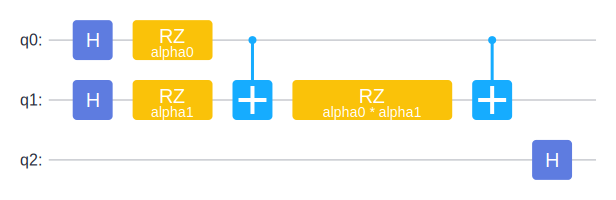

In [25]:
circuit1.svg()